### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import LimitsOfPhytoplankton as lop

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 13})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 13}
plt.rcParams['text.usetex'] = True
plt.rc('font', **font)

### a constant stofoo will lead to a constant xlim3, which at these namtrc designations is 1 except for fixers -- will not work. 

In [4]:
namtrc = '/gpfs/home/mep22dku/scratch/ModelRuns/TOM12_TJ_R4A0/namelist.trc.sms'

depth = 12
#rn_kmfphy
rows = ['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX']
print(rows)
rn_kmfphy = lop.findInTrcSms(namtrc, 'rn_kmfphy', verbose = True)
rn_qmaphy = lop.findInTrcSms(namtrc, 'rn_qmaphy', verbose = True)
rn_qmiphy = lop.findInTrcSms(namtrc, 'rn_qmiphy', verbose = True)  
rn_qopphy = lop.findInTrcSms(namtrc, 'rn_qopphy', verbose = True)  
rn_nutthe = lop.findInTrcSms(namtrc, 'rn_nutthe', lon = 1, verbose = True) 


for i in range(0,6):
    
    pPFT = [rows[i]]
    stofoo = lop.read_in_stofoo(depth, pPFT, tval = 'p0.50')
    quopfe = max(min(stofoo[0],rn_qmaphy[i]),rn_qmiphy[i])
    
    xlim3 =min((quopfe-rn_qmiphy[i])/(rn_qopphy[i]-rn_qmiphy[i]),1.)*(1.+rn_nutthe)-rn_nutthe
    
    # print(f'{stofoo[0]}, {rn_qmiphy[i]} -- {rn_qmaphy[i]}')
    # print(quopfe)
    # print(rn_qopphy[i])    
    print(f'{pPFT} {xlim3} (stofoo {stofoo[0]})')
    print()

['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX']
rn_kmfphy =    40.0e-9 , 25.0e-9 , 15.0e-9 , 10.0e-9 , 25.0e-9 , 40.0e-9 ,
[4.0e-08 2.5e-08 1.5e-08 1.0e-08 2.5e-08 4.0e-08]
rn_qmaphy =    20.e-6  , 20.e-6  , 20.e-6  , 20.e-6  , 20.e-6  , 20.e-6  ,
[2.e-05 2.e-05 2.e-05 2.e-05 2.e-05 2.e-05]
rn_qmiphy =     4.0e-6 ,  4.0e-6 ,  4.0e-6 , 4.0e-6  ,  4.0e-6 ,  4.0e-6 ,
[4.e-06 4.e-06 4.e-06 4.e-06 4.e-06 4.e-06]
rn_qopphy =     8.6e-6 ,  8.6e-6 ,  8.6e-6 , 8.6e-6  ,  8.6e-6 ,  8.6e-6 ,
[8.6e-06 8.6e-06 8.6e-06 8.6e-06 8.6e-06 8.6e-06]
rn_nutthe =     0.0,
[0.]
['DIA'] [1.] (stofoo 1.7954351763095758e-05)

['MIX'] [1.] (stofoo 1.0801362241445672e-05)

['COC'] [1.] (stofoo 1.2707981528857029e-05)

['PIC'] [1.] (stofoo 1.4424266044531772e-05)

['PHA'] [1.] (stofoo 1.5511637153573006e-05)

['FIX'] [1.] (stofoo 8.975898622027665e-06)



I'm running 1990 in ~e031/scratch/Tereza_ET_R4B1

It saves etot as qsr3d in grid_T

and lim[238]PFT in diad, in which PFT is 1 of the 6 pPFTs, though 2 lim2 are 
missing for which rn_kmfphy is the same as another pPFT

The code is in ~e031/nemo_v3.6/Tereza/
The results are identical to your 1990

Let me know if you need more details,

Erik.

In [5]:
tdir = f'/gpfs/home/e031/scratch/Tereza_ET_R4B1/'
# ORCA2_1m_19900101_19901231_grid_T.nc
# ORCA2_1m_19900101_19901231_grid_U.nc
# ORCA2_1m_19900101_19901231_grid_V.nc
# ORCA2_1m_19900101_19901231_grid_W.nc
# ORCA2_1m_19900101_19901231_icemod.nc
# ORCA2_1m_19900101_19901231_ptrc_T.nc
# ORCA2_1m_19900101_19901231_diad_T.nc



In [6]:
import LimitsOfPhytoplankton as lop

print(rows)
rn_kmpphy, rn_kmnphy, rn_nutthe, rn_sildia, rn_qmaphy, rn_qmiphy, rn_qopphy = \
lop.getParsFromTrcSms(namtrc, verbose = True)

['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX']
rn_kmpphy: [1.59e-05 1.59e-05 6.10e-06 9.15e-06 9.76e-05 2.44e-05] (nitrogen half saturation concentrat.)
rn_kmnphy: [2.0e-06 2.0e-06 1.0e-06 1.5e-06 1.5e-05 6.0e-06] (phosphate half saturation concentration)
rn_nutthe: [0.]
rn_sildia: [4.2e-07]
rn_qmaphy: [2.e-05 2.e-05 2.e-05 2.e-05 2.e-05 2.e-05]
rn_qmiphy: [4.e-06 4.e-06 4.e-06 4.e-06 4.e-06 4.e-06]
rn_qopphy: [8.6e-06 8.6e-06 8.6e-06 8.6e-06 8.6e-06 8.6e-06]


In [7]:
#lim3ar = [lim3dia, lim3mix, lim3coc, lim3pic, lim3pha, lim3fix]

In [8]:
def findInTrcSms(filename, variable, lon = 6, verbose = True):
    
    #for finding variables in namelist.trc.sms and returning them as an array
    w5 = np.nan
    with open(filename, 'r') as file:
        for line in file:
            ## find and parse the variables
            if variable in line:
                w = line.strip()
                w1 = ''.join(w.split())
                w2 = w1.split('=')
                w3 = w2[1].split(',')
                w4 = w3[0:lon]
                w5 = np.array(w4).astype(float)
                if verbose: 
                    print(w)
                    print(w5)
    return w5
                        

def getParsFromTrcSms(namtrc, verbose = True):
    
    rn_kmpphy = findInTrcSms(namtrc, 'rn_kmpphy', verbose = False)
    rn_kmnphy = findInTrcSms(namtrc, 'rn_kmnphy', verbose = False)
    rn_nutthe = findInTrcSms(namtrc, 'rn_nutthe',lon = 1, verbose = False)
    rn_sildia = findInTrcSms(namtrc, 'rn_sildia',lon = 1, verbose = False)
    rn_qmaphy = findInTrcSms(namtrc, 'rn_qmaphy', verbose = False)
    rn_qmiphy = findInTrcSms(namtrc, 'rn_qmiphy', verbose = False)  
    rn_qopphy = findInTrcSms(namtrc, 'rn_qopphy', verbose = False)  
    rn_munfix = findInTrcSms(namtrc, 'rn_munfix',lon = 1, verbose = False) 
    
    if verbose:
        print(f'rn_kmpphy: {rn_kmpphy} (nitrogen half saturation concentrat.)')
        print(f'rn_kmnphy: {rn_kmnphy} (phosphate half saturation concentration)')
        print(f'rn_nutthe: {rn_nutthe}')
        print(f'rn_sildia: {rn_sildia}')        
        print(f'rn_qmaphy: {rn_qmaphy}')
        print(f'rn_qmiphy: {rn_qmiphy}')   
        print(f'rn_qopphy: {rn_qopphy}')  
        print(f'rn_munfix: {rn_munfix}')  
        
    return rn_kmpphy, rn_kmnphy, rn_nutthe, rn_sildia, rn_qmaphy, rn_qmiphy, rn_qopphy, rn_munfix

In [9]:
def get_lim(pPFT,jppo4,jpsil,jpdin, rn_kmpphy, rn_kmnphy, rn_nutthe,\
            rn_sildia, rn_qmaphy, rn_qmiphy, rn_qopphy, rn_munfix, lim3ar, \
            depth = 0, verbose = False):
    
    mapping = {
        "DIA": 0,
        "MIX": 1,
        "COC": 2,
        "PIC": 3,
        "PHA": 4,
        "FIX": 5
    }
    
    
    rn_kmpphy = rn_kmpphy[mapping[pPFT]]
    rn_kmnphy = rn_kmnphy[mapping[pPFT]]
    rn_qmaphy = rn_qmaphy[mapping[pPFT]]
    rn_qmiphy = rn_qmiphy[mapping[pPFT]]
    rn_qopphy = rn_qopphy[mapping[pPFT]]
    rn_nutthe = rn_nutthe[0]    
    rn_sildia = rn_sildia[0]
    xlim3_fer = lim3ar[mapping[pPFT]]
        
    if verbose:
        print(f'for {pPFT} we have the following parameters')
        print(f'rn_kmpphy: {rn_kmpphy} (nitrogen half saturation concentrat.)')
        print(f'rn_kmnphy: {rn_kmnphy} (phosphate half saturation concentration)')

        print('----')
        print(f'we are furthermore using the following constants')
        print(f'rn_nutthe: {rn_nutthe}')
        print(f'rn_sildia: {rn_sildia}')

    xlim5_sil = 1 ## silica limita
    # xlim3_fer = 1 #we don't fully understand iron, iron model not currently in
    
    limnut = -99 #(1 = NO3, 2 = Si, 3 = PO4, 4 = Fe)
    xlim_phyt = -99 
    
    xlim4_po4 = (jppo4 - rn_kmpphy * rn_nutthe) / ((jppo4) + rn_kmpphy * (1 - rn_nutthe))
    
    if pPFT == 'DIA':
        
        xlim5_sil = (jpsil - rn_sildia * rn_nutthe) / (jpsil + rn_sildia * (1 - rn_nutthe))
        
    xlim6_din = (jpdin - rn_kmnphy * rn_nutthe) / (jpdin + rn_kmnphy * (1 - rn_nutthe))
    
    if pPFT == 'FIX':
        
        dinlim = (jpdin - rn_kmnphy * rn_nutthe) / (jpdin + rn_kmnphy * (1 - rn_nutthe))
        xlim6_din = dinlim +rn_munfix*(1.-dinlim)
        
    ##xlim_fer
    # stofoo = read_in_stofoo(depth, pPFT, tval = 'p0.50')
    # quopfe = max(min(stofoo,rn_qmaphy),rn_qmiphy)
    # xlim3_fer =min((quopfe-rn_qmiphy)/(rn_qopphy-rn_qmiphy),1.)*(1.+rn_nutthe)-rn_nutthe
    

    xlim_phyt = np.min([xlim4_po4,xlim5_sil,xlim6_din,xlim3_fer])
    
    #(1 = NO3, 2 = Si, 3 = PO4, 4 = Fe)

    if xlim_phyt == xlim6_din:
        limnut = 1
    if xlim_phyt == xlim5_sil:
        limnut = 2
    if xlim_phyt == xlim4_po4:
        limnut = 3
    if xlim_phyt == xlim3_fer:
        limnut = 4

    if verbose:
        
        print('---')
        try:
            print(f'NO3 limitation {xlim6_din.values}')
        except:
            print(f'NO3 limitation {xlim6_din}') 
        try:
            print(f'Si limitation {xlim5_sil.values}') 
        except:
            print(f'Si limitation {xlim5_sil}') 
        try:
            print(f'PO4 limitation {xlim4_po4.values}')  
        except:
            print(f'PO4 limitation {xlim4_po4}')  
        try:
            print(f'Fer limitation {xlim3_fer.values}')
        except:
            print(f'Fer limitation {xlim3_fer}')
        print('--')
        print(f'limiting nutrient is: {limnut} with value of {xlim_phyt}')
        print('(1 = NO3, 2 = Si, 3 = PO4, 4 = Fe)')
        
    return limnut, xlim_phyt, xlim6_din, xlim5_sil, xlim4_po4, xlim3_fer 

In [10]:

def GetLimitsOfPhytoplankton(trcsmsPath,modelName,year,pPFT,ptrcf,diadf,\
                             whereToSave = '/gpfs/home/mep22dku/scratch/LimitsOfPhytoplankton/data/', 
                             verbose = False, dlim = 19):
    
    '''
    
    written by TJŠJ at UEA, 2024, T.Jarnikova@uea.ac.uk
    based on RIV12/NEMO/TOP_SRC/PlankTOM/bgcpro.F90, written by ET
    
    calculates limiting nutrient from ptrc outputs for a given model, year, phytoplankton functional type, and namelist.trc.sms. 
    saves as: {WhereToSave}/{modelName}_y{year}_{pPFT}_LoP.nc
    saves both limiting nutrient (1 = NO3, 2 = Si, 3 = PO4, 4 = Fe) and value of nutrient limitation (0-1)

    arguments:
    trcsmsPath 
        path to namelist.trc.sms. eg '/gpfs/home/mep22dku/scratch/ModelRuns/TOM12_TJ_R4A0/namelist.trc.sms'
    modelName
        name of model, eg TOM12_TJ_RVA0
    year
        year to run for, eg 1955 
    pPFT
        functional group, one of DIA MIX COC	PIC	PHA	FIX	
    ModelDirectory = '/gpfs/data/greenocean/software/runs/'
        where model is found, default shown above;
    whereToSave = '/gpfs/home/mep22dku/scratch/LimitsOfPhytoplankton/data/', 
        where model is found, default shown above;
    verbose = False, 
        if this is true the script outputs various facts about what it's doing
    dlim = 23
        depth level to calculate to - this is an expensive routine, by default it goes up to but not including depth level 23
        (python indexing, first level is 0. by default last included level is approx 1000 m)
    
    '''
    print('land ho')
    
    t1 = time.time()
    ## get and open ptrc
    w = xr.open_dataset(ptrcf)
    w2 = xr.open_dataset(diadf)
    nav_lat = w.nav_lat
    nav_lon = w.nav_lon
    deptht = w.deptht
    time_counter = w.time_counter
    
    #get vals out as array
    NO3 = w.NO3.values
    Si = w.Si.values
    PO4 = w.PO4.values
    
    #
    lim3dia = w2.lim3dia.values
    lim3mix = w2.lim3mix.values
    lim3coc = w2.lim3coc.values
    lim3pic = w2.lim3pic.values
    lim3pha = w2.lim3pha.values
    lim3fix = w2.lim3fix.values
    
    
    tmask = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
    tmesh = tmask.tmask.values 
    
    limitNut = np.zeros([12,31,149,182])
    limitVal = np.zeros([12,31,149,182])
    limitN = np.zeros([12,31,149,182])
    limitS = np.zeros([12,31,149,182])
    limitP = np.zeros([12,31,149,182])
    limitF = np.zeros([12,31,149,182])
    
    savenam = f'{whereToSave}/{modelName}_y{year}_{pPFT}_LoP.nc'
    print(f'making {savenam}')
        
        
    rn_kmpphy, rn_kmnphy, rn_nutthe, rn_sildia, rn_qmaphy, rn_qmiphy, rn_qopphy, rn_munfix\
    = getParsFromTrcSms(trcsmsPath, verbose = True) 
    

    for d in range(0,dlim): #do
        print(f'd {d}')
        for y in range(0,149): #149
            
            if (y%10 == 0):
                print(f'y {y}')
            
            for x in range(0,182): #182

                if tmesh[0,d,y,x] == 0:
                    pass
                else:
                    for t in range(0,12):

                        jpdin = NO3[t,d,y,x]
                        jpsil = Si[t,d,y,x]
                        jppo4 = PO4[t,d,y,x]
                        
                        tlim3dia = lim3dia[t,d,y,x]
                        tlim3mix = lim3mix[t,d,y,x]
                        tlim3coc = lim3coc[t,d,y,x]
                        tlim3pic = lim3pic[t,d,y,x]
                        tlim3pha = lim3pha[t,d,y,x]
                        tlim3fix = lim3fix[t,d,y,x]
                        
                        lim3ar = [tlim3dia, tlim3mix, tlim3coc, tlim3pic, tlim3pha, tlim3fix]
                        
                        
                        limnut, xlim_phyt, xlim6_din, xlim5_sil, xlim4_po4, xlim3_fer = \
                        get_lim(pPFT,jppo4,jpsil,jpdin, rn_kmpphy, rn_kmnphy, rn_nutthe,\
                        rn_sildia, rn_qmaphy, rn_qmiphy, rn_qopphy, rn_munfix, lim3ar, \
                        depth = 0, verbose = False)              #get_lim(pPFT,jppo4,jpsil,jpdin, rn_kmpphy, rn_kmnphy, rn_nutthe, rn_sildia, depth = d, verbose = verbose)
                        
                        limitNut[t,d,y,x] = limnut
                        limitVal[t,d,y,x] = xlim_phyt
                        limitN[t,d,y,x] = xlim6_din
                        limitS[t,d,y,x] = xlim5_sil
                        limitP[t,d,y,x] = xlim4_po4
                        limitF[t,d,y,x] = xlim3_fer

    ### save as .nc    
    data_vars = {'limitNut':(['time_counter', 'deptht', 'y', 'x'], limitNut,
    {'units': 'dimensionless',
    'long_name':'limiting nutrient (1 = NO3, 2 = Si, 3 = PO4, 4 = Fe) '}),
                 
                 'limitVal':(['time_counter', 'deptht', 'y', 'x'], limitVal,
    {'units': 'dimensionless',
    'long_name':'value of nutrient limitation, 0-1'}),
                 
                 'limitN':(['time_counter', 'deptht', 'y', 'x'], limitN,
    {'units': 'dimensionless',
    'long_name':'value of nutrient limitation, 0-1'}),
                 
                'limitS':(['time_counter', 'deptht', 'y', 'x'], limitS,
    {'units': 'dimensionless',
    'long_name':'value of nutrient limitation, 0-1'}),
                 
                 'limitP':(['time_counter', 'deptht', 'y', 'x'], limitP,
    {'units': 'dimensionless',
    'long_name':'value of nutrient limitation, 0-1'}),
                 
                 'limitF':(['time_counter', 'deptht', 'y', 'x'], limitF,
    {'units': 'dimensionless',
    'long_name':'value of nutrient limitation, 0-1'}),
    }
    # define coordinates
    coords = {'time_counter': (['time_counter'], time_counter),
    'nav_lat': (['y','x'], nav_lat),
    'nav_lon': (['y','x'], nav_lon),
    'deptht': (['deptht'], deptht)}
    # define global attributes
    attrs = {'made in':'LimitsOfPhytoplankton/explore.ipynb',
    'desc': f'calculated to depth level {dlim}'
    }
    ds = xr.Dataset(data_vars=data_vars,
    coords=coords,
    attrs=attrs)
    ds.to_netcdf(savenam)


    t2 = time.time()
    if verbose:
        print(f'seconds taken: {t2-t1}')
#     return w
    return ds

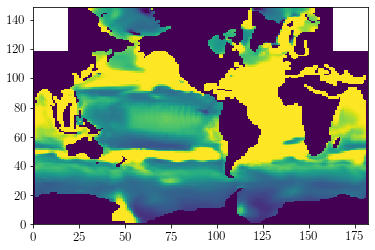

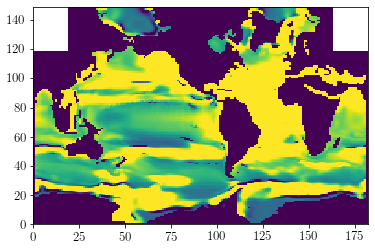

In [11]:
diadf = xr.open_dataset(f'/gpfs/home/e031/scratch/Tereza_ET_R4B1/ORCA2_1m_19900101_19901231_diad_T.nc')

diadf
plt.figure()
plt.pcolormesh(diadf.lim3fix[0,0,:,:])
plt.figure()
plt.pcolormesh(diadf.lim3fix[0,6,:,:])

In [12]:
ptrcf = f'/gpfs/home/e031/scratch/Tereza_ET_R4B1/ORCA2_1m_19900101_19901231_ptrc_T.nc'
diadf = f'/gpfs/home/e031/scratch/Tereza_ET_R4B1/ORCA2_1m_19900101_19901231_diad_T.nc'

trcsmsPath = '/gpfs/home/mep22dku/scratch/ModelRuns/TOM12_TJ_R4A0/namelist.trc.sms'
modelName = 'TOM12_TJ_R4B1'
year = 1990
ex = False
if ex:
    
    pPFT = 'DIA'
    ds = GetLimitsOfPhytoplankton(trcsmsPath,modelName,year,pPFT,ptrcf,diadf,\
                                 whereToSave = '/gpfs/home/mep22dku/scratch/LimitsOfPhytoplankton/data/', 
                                 verbose = False, dlim = 10)

    pPFT = 'MIX'
    ds = GetLimitsOfPhytoplankton(trcsmsPath,modelName,year,pPFT,ptrcf,diadf,\
                                 whereToSave = '/gpfs/home/mep22dku/scratch/LimitsOfPhytoplankton/data/', 
                                 verbose = False, dlim = 10)


    pPFT = 'COC'
    ds = GetLimitsOfPhytoplankton(trcsmsPath,modelName,year,pPFT,ptrcf,diadf,\
                                 whereToSave = '/gpfs/home/mep22dku/scratch/LimitsOfPhytoplankton/data/', 
                                 verbose = False, dlim = 10)


    pPFT = 'PIC'
    ds = GetLimitsOfPhytoplankton(trcsmsPath,modelName,year,pPFT,ptrcf,diadf,\
                                 whereToSave = '/gpfs/home/mep22dku/scratch/LimitsOfPhytoplankton/data/', 
                                 verbose = False, dlim = 10)

    pPFT = 'PHA'
    ds = GetLimitsOfPhytoplankton(trcsmsPath,modelName,year,pPFT,ptrcf,diadf,\
                                 whereToSave = '/gpfs/home/mep22dku/scratch/LimitsOfPhytoplankton/data/', 
                                 verbose = False, dlim = 10)

    pPFT = 'FIX'
    ds = GetLimitsOfPhytoplankton(trcsmsPath,modelName,year,pPFT,ptrcf,diadf,\
                                 whereToSave = '/gpfs/home/mep22dku/scratch/LimitsOfPhytoplankton/data/', 
                                 verbose = False, dlim = 10)


    rows = ['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX']

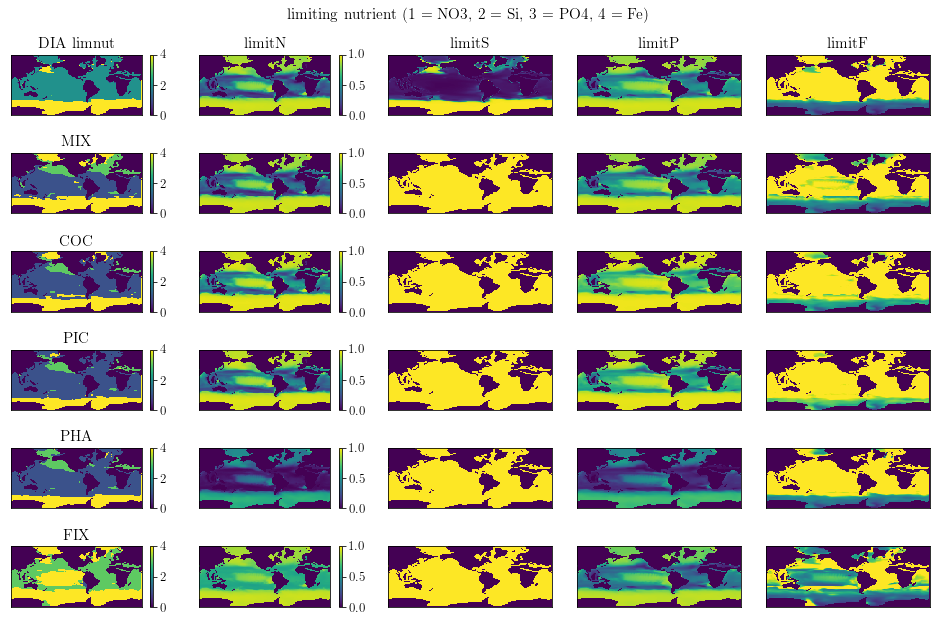

In [13]:
rows = ['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX']

ref = xr.open_dataset(diadf)

w = xr.open_dataset(f'./data/TOM12_TJ_R4B1_y1990_DIA_LoP.nc')

fact = 1.1
fig, axs = plt.subplots(6,5, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()



st = 'limiting nutrient (1 = NO3, 2 = Si, 3 = PO4, 4 = Fe)'

ind = 0 
for i in range(0,6):
    
    w = xr.open_dataset(f'./data/TOM12_TJ_R4B1_y1990_{rows[i]}_LoP.nc')
    q = axs[ind].pcolormesh(w.limitNut[0,0,:,:], vmin = 0, vmax = 4)
    q1 = axs[ind+1].pcolormesh(w.limitN[0,0,:,:], vmin = 0, vmax = 1)
    q2 = axs[ind+2].pcolormesh(w.limitS[0,0,:,:], vmin = 0, vmax = 1)
    q3 = axs[ind+3].pcolormesh(w.limitP[0,0,:,:], vmin = 0, vmax = 1)
    q4 = axs[ind+4].pcolormesh(w.limitF[0,0,:,:], vmin = 0, vmax = 1)
    
    plt.colorbar(q, ax = axs[ind])
    plt.colorbar(q1, ax = axs[ind+1])
    axs[ind].set_title(rows[i])


    
    if i == 0:
        axs[ind].set_title(f'{rows[i]} limnut')
        axs[ind+1].set_title(f'limitN')
        axs[ind+2].set_title(f'limitS')
        axs[ind+3].set_title(f'limitP')
        axs[ind+4].set_title(f'limitF')
    ind = ind+5   
    
for i in range(0,30):
    axs[i].set_xticks([])
    axs[i].set_yticks([])
   
plt.suptitle(st)
plt.tight_layout()
    

In [14]:
diadf

w = xr.open_dataset(f'./data/TOM12_TJ_R4B1_y1990_DIA_LoP.nc')
refd = xr.open_dataset(diadf)

print(list(refd.data_vars.keys()))

['deptht_bounds', 'DOCTRP', 'time_centered_bounds', 'time_counter_bounds', 'CARBTRP', 'CAPITRP', 'ALKTRP', 'EXP', 'GRAMIC', 'GRAMES', 'GRAMAC', 'PPTDOC', 'PPT', 'TChl', 'Detrit', 'Carniv', 'Herbiv', 'GRAMICPHY', 'GRAPTEPHY', 'GRAMESPHY', 'GRAGELPHY', 'GRAMACPHY', 'nitrfix', 'denitr', 'DELO2', 'vsink', 'sinksil', 'discarb', 'ExpCO3', 'ExpARA', 'GRAGEL', 'GRAPTE', 'proara', 'prococ', 'lim2coc', 'lim2pic', 'lim2pha', 'lim2fix', 'lim3dia', 'lim3mix', 'lim3coc', 'lim3pic', 'lim3pha', 'lim3fix', 'lim8dia', 'lim8mix', 'lim8coc', 'lim8pic', 'lim8pha', 'lim8fix', 'Cflx', 'PICflx', 'Oflx', 'dpCO2', 'pCO2', 'PPINT']


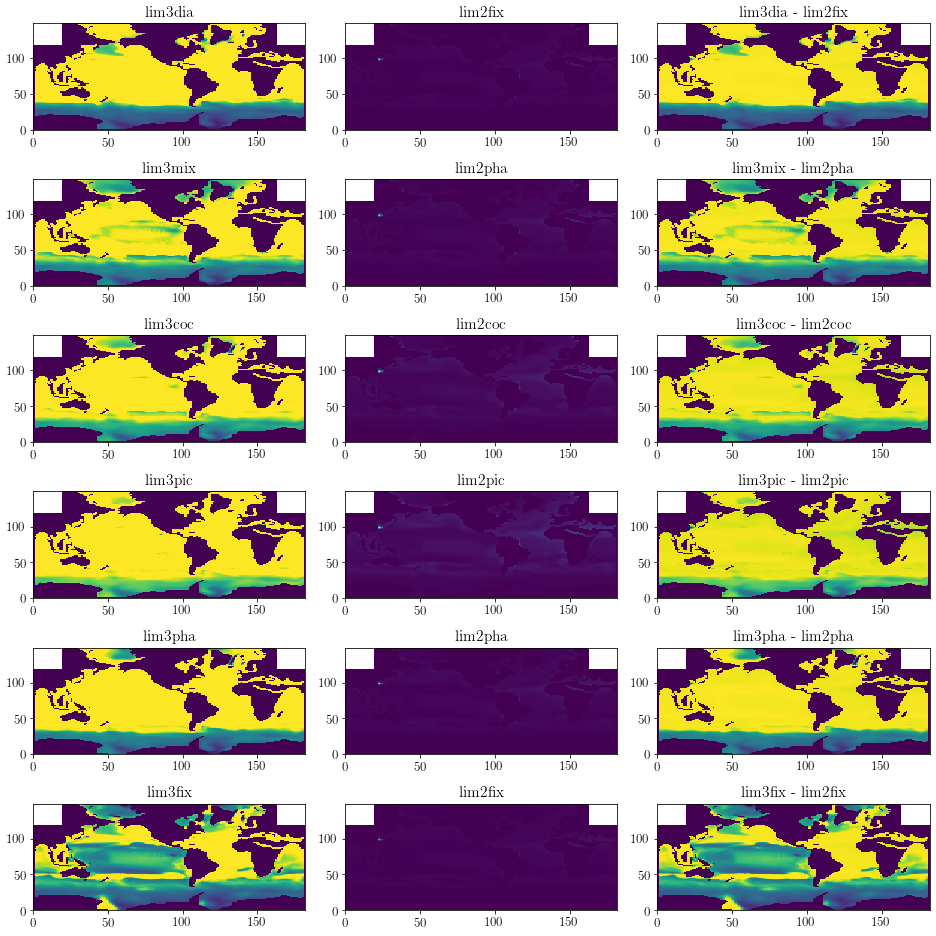

In [15]:
# #'lim2coc', 'lim2pic', 'lim2pha', 'lim2fix', 
# 'lim3dia',#'lim3mix', 'lim3coc', 'lim3pic', 'lim3pha', 'lim3fix',
# lim2dia = lim2fix
# lim2mix = lim2pha
# plt.pcolormesh(refd.lim3dia[0,0,:,:] - w.limitF[0,0,:,:])

t3 = ['lim3dia','lim3mix', 'lim3coc', 'lim3pic', 'lim3pha', 'lim3fix']
t2 = ['lim2fix','lim2pha','lim2coc', 'lim2pic', 'lim2pha', 'lim2fix']

fact = 1.1
fig, axs = plt.subplots(6,3, figsize=(12*fact, 12*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

ind = 0
for i in range(0,6):
    axs[ind].pcolormesh(refd[t3[i]][0,0,:,:], vmin = 0, vmax = 1)
    axs[ind+1].pcolormesh(refd[t2[i]][0,0,:,:], vmin = 0, vmax = 1)
    axs[ind+2].pcolormesh(refd[t3[i]][0,0,:,:] - refd[t2[i]][0,0,:,:], vmin = 0, vmax = 1)
    axs[ind].set_title(t3[i])
    axs[ind+1].set_title(t2[i])
    axs[ind+2].set_title(f'{t3[i]} - {t2[i]}')
    ind = ind+3
    
plt.tight_layout()


lim3dia to lim2fix, r/p: 0.9147997948949267 0.0
lim3mix to lim2pha, r/p: 0.8567702131994139 0.0
lim3coc to lim2coc, r/p: 0.8484911381687594 0.0
lim3pic to lim2pic, r/p: 0.6707590085220598 0.0
lim3pha to lim2pha, r/p: 0.8626619879005364 0.0
lim3fix to lim2fix, r/p: 0.7762700268246361 0.0


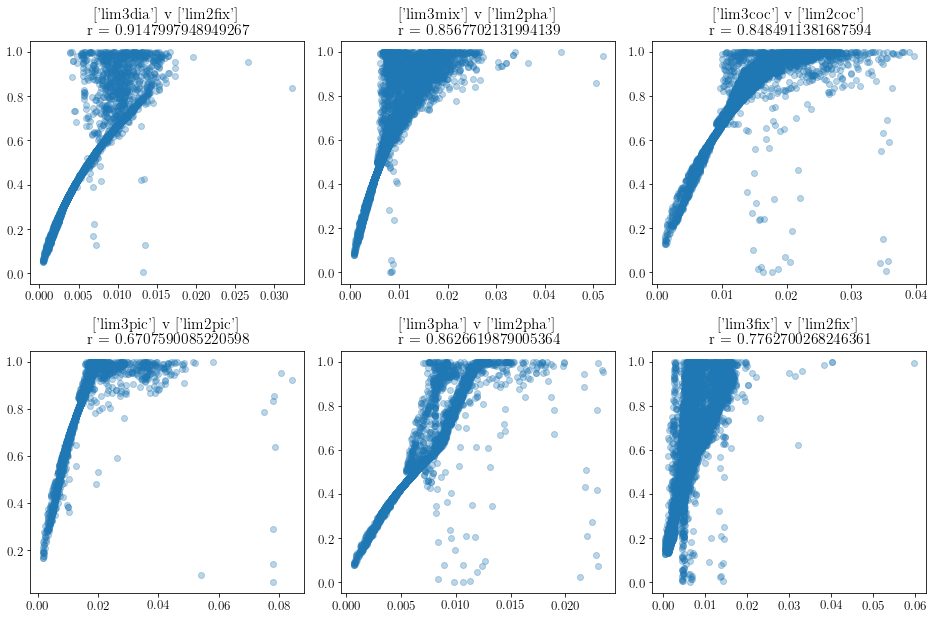

In [110]:
from scipy.stats import pearsonr
t3 = ['lim3dia','lim3mix', 'lim3coc', 'lim3pic', 'lim3pha', 'lim3fix']
t2 = ['lim2fix','lim2pha','lim2coc', 'lim2pic', 'lim2pha', 'lim2fix']

fact = 1.1
fig, axs = plt.subplots(2,3, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

ind = 0
for i in range(0,6):
    tt3 = np.ravel(refd[t3[i]][0,0,:,:])
    tt2 = np.ravel(refd[t2[i]][0,0,:,:])
    
    mask = ((tt3 <1) & (tt3 != 0) & (tt2 != 0) & (~np.isnan(tt3)) & (~np.isnan(tt2)))

    axs[i].plot(tt2[mask],tt3[mask], marker = 'o', alpha = 0.3, linestyle = '')

    tt2con = tt2[mask];
    tt3con = tt3[mask];
    
    r_value, p_value = pearsonr(tt3con, tt2con)
    print(f'{t3[i]} to {t2[i]}, r/p: {r_value} {p_value}')
    
    axs[i].set_title(f'{[t3[i]]} v {[t2[i]]} \n r = {r_value}')
    
plt.tight_layout()

## can we get a heuristic for xlim3 from xlim2?

a) does xlim2 output and calculated look the same? yes

b) get an xlim3 halfsat proxy/

In [17]:
ptrcf = xr.open_dataset(f'/gpfs/home/e031/scratch/Tereza_ET_R4B1/ORCA2_1m_19900101_19901231_ptrc_T.nc')
diadf = xr.open_dataset(f'/gpfs/home/e031/scratch/Tereza_ET_R4B1/ORCA2_1m_19900101_19901231_diad_T.nc')

In [18]:
rn_kmfphy = findInTrcSms(namtrc, 'rn_kmfphy', verbose = False)
rn_kmfphy

array([4.0e-08, 2.5e-08, 1.5e-08, 1.0e-08, 2.5e-08, 4.0e-08])

In [19]:
#xlim2 = trn(ji,jj,jk,jpfer)/(trn(ji,jj,jk,jpfer   rn_kmfphy(jl))
rows = ['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX']

xlim2_DIA = ptrcf.Fer/(ptrcf.Fer + rn_kmfphy[0])

xlim2_COC = ptrcf.Fer/(ptrcf.Fer + rn_kmfphy[2])

0.9999991204880019,0.0
0.9999973856258322,0.0


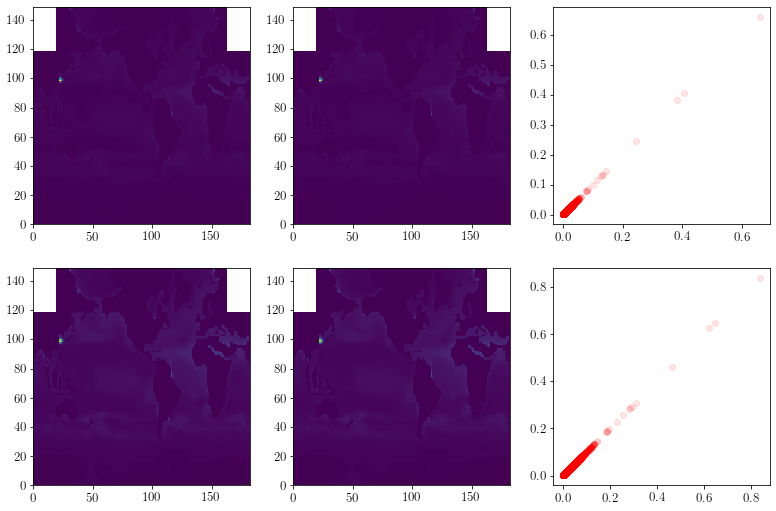

In [20]:
import scipy

fig, axs = plt.subplots(2,3, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

axs[0].pcolormesh(xlim2_DIA[0,0,:,:])
axs[1].pcolormesh(diadf.lim2fix[0,0,:,:])

diac = xlim2_DIA[0,0,:,:].values
diae = diadf.lim2fix[0,0,:,:].values
diacp = diac[~np.isnan(diac) & ~np.isnan(diae) & (diac != 0) & (diae != 0)]
diaep = diae[~np.isnan(diac) & ~np.isnan(diae) & (diac != 0) & (diae != 0)]

axs[2].plot(diacp, diaep, 'ro', alpha = 0.1)
r, p = scipy.stats.pearsonr(diacp, diaep)
print(f'{r},{p}')


axs[3].pcolormesh(xlim2_COC[0,0,:,:])
axs[4].pcolormesh(diadf.lim2coc[0,0,:,:])

diac = xlim2_COC[0,0,:,:].values
diae = diadf.lim2coc[0,0,:,:].values
diacp = diac[~np.isnan(diac) & ~np.isnan(diae) & (diac != 0) & (diae != 0)]
diaep = diae[~np.isnan(diac) & ~np.isnan(diae) & (diac != 0) & (diae != 0)]

axs[5].plot(diacp, diaep, 'ro', alpha = 0.1)
r, p = scipy.stats.pearsonr(diacp, diaep)
print(f'{r},{p}')

In [21]:
# list(ptrcf.data_vars.keys())
ptrcf = xr.open_dataset(f'/gpfs/home/e031/scratch/Tereza_ET_R4B1/ORCA2_1m_19900101_19901231_ptrc_T.nc')
vtd = ['O2','DIC','PIIC','NO3','Si','PO4','Fer','DOC','CaCO3','ARA',\
 'POC','GOC','BAC','PRO','PTE','MES','GEL','MAC','DIA','MIX','COC',\
 'PIC','PHA','FIX','BSi','GON']


ptrcc = ptrcf.copy()
ptrcc = ptrcc.drop_vars(vtd)

td = np.zeros([12,31,149,182])
var_copy = ptrcc['Alkalini'].copy()
var_copy.name = 'ex'
var_copy.data = td
ptrcc['ex'] =var_copy

In [98]:
#ptrcf.Fer/(ptrcf.Fer + rn_kmfphy[0])



rows = ['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX']

def get_xlimdenom(xlim3, fer,pft):
    
    
    w2 = xr.open_dataset('./data/stofoo_output/TOM12_TJ_R4B1_01341375_stofoo.nc')
    w2 = w2.assign(csize=w2['e3t_0'])
    csize = np.zeros([1,31,149,182])
    for i in range(0,31):
        csize[0,i,:,:] = w2.tmask[0,i,:,:] * w2.e1t[0,:,:] * w2.e2t[0,:,:]
    w2['csize'].values = csize
    
    savenam = f'./data/R4B1_lim2den_{pft}.nc'
    print(savenam)
    den = np.zeros_like(xlim3)
    
    for t in range(0,12):
        for d in range(0,20):
            for y in range(0,149):
                for x in range(0,182):
                    
                    c = w2.csize[0,d,y,x]
                    F = fer[t,d,y,x]
                    L = xlim3[t,d,y,x]
                    
                    if ((c == 0)):
                        pass
                    if ((c == 0)):
                        pass                    
                    else:
                        tde = (F*(1-L))/L
                        den[t,d,y,x] = tde
#                         if (x == 70):
#                             print(f't{t} d{d} y{y} x{x}: F{F} L{L} tde{tde}')
                        
    
    ptrcf = xr.open_dataset(f'/gpfs/home/e031/scratch/Tereza_ET_R4B1/ORCA2_1m_19900101_19901231_ptrc_T.nc')
    vtd = ['O2','DIC','PIIC','NO3','Si','PO4','Fer','DOC','CaCO3','ARA',\
     'POC','GOC','BAC','PRO','PTE','MES','GEL','MAC','DIA','MIX','COC',\
     'PIC','PHA','FIX','BSi','GON']


    ptrcc = ptrcf.copy()
    ptrcc = ptrcc.drop_vars(vtd)

    td = np.zeros([12,31,149,182])
    var_copy = ptrcc['Alkalini'].copy()
    var_copy.name = 'lim2den'
    var_copy.data = den
    ptrcc['lim2den'] =var_copy
    
    ptrcc.to_netcdf(savenam)
                        
    return den
    
ex = True
if ex:
    # t3 = ['lim3dia','lim3mix', 'lim3coc', 'lim3pic', 'lim3pha', 'lim3fix']
    # t2 = ['lim2fix','lim2pha','lim2coc', 'lim2pic', 'lim2pha', 'lim2fix']
    # rows = ['DIA', 'MIX', 'COC', 'PIC', 'PHA', 'FIX']
    Fer = ptrcf.Fer.values; lim3 = diadf.lim3dia.values
    den = get_xlimdenom(lim3, Fer, 'DIA')

    Fer = ptrcf.Fer.values; lim3 = diadf.lim3mix.values
    den = get_xlimdenom(lim3, Fer, 'MIX')

    Fer = ptrcf.Fer.values; lim3 = diadf.lim3coc.values
    den = get_xlimdenom(lim3, Fer, 'COC')

    Fer = ptrcf.Fer.values; lim3 = diadf.lim3pic.values
    den = get_xlimdenom(lim3, Fer, 'PIC')

    Fer = ptrcf.Fer.values; lim3 = diadf.lim3pha.values
    den = get_xlimdenom(lim3, Fer, 'PHA')

    Fer = ptrcf.Fer.values; lim3 = diadf.lim3fix.values
    den = get_xlimdenom(lim3, Fer, 'FIX')

./data/R4B1_lim2den_DIA.nc
./data/R4B1_lim2den_MIX.nc
./data/R4B1_lim2den_COC.nc
./data/R4B1_lim2den_PIC.nc
./data/R4B1_lim2den_PHA.nc
./data/R4B1_lim2den_FIX.nc


[4.0e-08 2.5e-08 1.5e-08 1.0e-08 2.5e-08 4.0e-08]


2.4618909688634005e-10, 0.4918060004711151, 0.0
2.543926297508064e-10


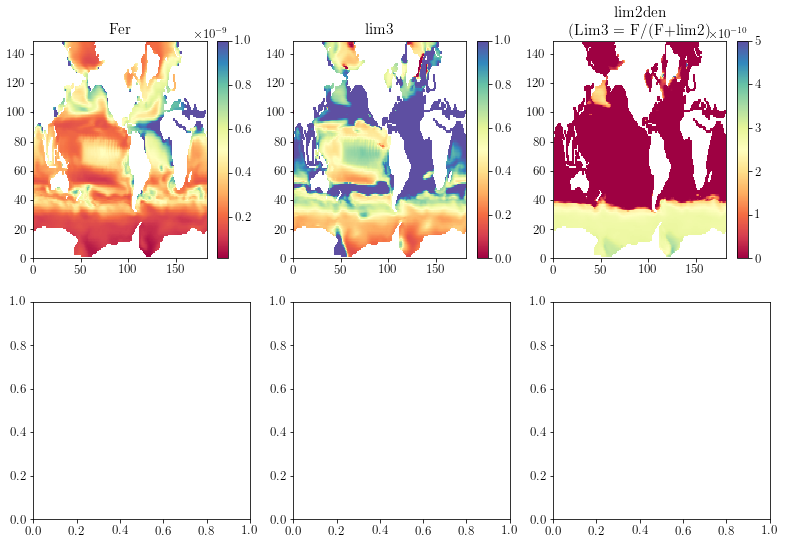

In [96]:
d = 0 
Fer = ptrcf.Fer[0,d,:,:].values; 
lim3 = diadf.lim3fix[0,d,:,:].values
ts = (w2.csize[0,0,:,:])
pft = 'DIA'
w = xr.open_dataset(f'./data/R4B1_lim2den_{pft}.nc')
lim2den = w.lim2den[0,d,:,:].values

Fer[ts == 0] = np.nan
lim3[ts == 0] = np.nan
lim2den[ts == 0] = np.nan


Fera = Fer[lim3 <1]
lim3a = lim3[lim3 <1]


cmap = plt.get_cmap("Spectral")

fact = 1.1
fig, axs = plt.subplots(2,3, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

ind = 0 
q = axs[ind].pcolormesh(Fer, vmin = 1e-11, vmax = 1e-9, cmap = cmap); axs[ind].set_title('Fer'); plt.colorbar(q, ax = axs[ind])
ind = 1
q = axs[ind].pcolormesh(lim3, vmin = 0, vmax = 1, cmap = cmap); axs[ind].set_title('lim3'); plt.colorbar(q, ax = axs[ind])
ind = 2
q = axs[ind].pcolormesh(lim2den, vmin = 1e-20, vmax = 5e-10, cmap = cmap); axs[ind].set_title('lim2den \n (Lim3 = F/(F+lim2)'); plt.colorbar(q, ax = axs[ind])


#tde = (F*(1-L))/L

y = 40; x = 30
print(f'{Fer[y,x]}, {lim3[y,x]}, {lim2den[y,x]}') 
print((Fer[y,x] * (1- lim3[y,x]))/ lim3[y,x])